In [2]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm 
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets,linear_model,metrics
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor 
from sklearn.datasets import make_classification
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.decomposition import PCA

In [3]:
data=pd.read_csv(r"C:\Users\Admin\Downloads\train.csv~\train.csv")

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
data.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [9]:
data.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [10]:
data.Product_Category_2.fillna(data.Product_Category_2.fillna("others"),inplace=True)

In [11]:
#data.Product_Category_3.fillna(data.Product_Category_3.mode().max(),inplace=True)

In [12]:
data.isnull().mean()

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.000000
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

In [13]:
x=data.iloc[0:,2:10]
y=data.Purchase

In [14]:
x.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,F,0-17,10,A,2,0,3,others
1,F,0-17,10,A,2,0,1,6.0
2,F,0-17,10,A,2,0,12,others
3,F,0-17,10,A,2,0,12,14.0
4,M,55+,16,C,4+,0,8,others


In [15]:
trainx,testx,trainy,testy = train_test_split(x,y,test_size = 0.2)
 
# trainx, testx, trainy, testy = train_test_split(y,y,test_size=0.2)

In [16]:
dummy=pd.get_dummies(x)
dummy=pd.get_dummies(dummy,columns=["Occupation","Product_Category_1"])


In [17]:
dummy

,Marital_Status,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
550064,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
550065,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
550066,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [18]:
scaler=MinMaxScaler()

In [19]:
model=scaler.fit(dummy)

In [20]:
d=model.transform(dummy)

In [21]:
df=pd.DataFrame(d)

In [22]:
dummy.head()

,Marital_Status,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
trainx,testx=train_test_split(df,test_size=0.2)


<h1>LINEAR REGRESSION<h1>

In [24]:
reg = LinearRegression().fit(trainx,trainy)


In [25]:
reg.predict(testx)

array([9172., 9208., 9288., ..., 9348., 9272., 9184.])

In [26]:
reg1 = DecisionTreeRegressor(random_state=0).fit(trainx,trainy)

In [27]:
reg1.predict(testx)

array([ 7109.38461538,  8025.90909091,  9804.48484848, ...,
       11281.5       ,  8573.23255814,  8845.5       ])

<h1>Random Forest Regressor<h1>

In [28]:
reg3 = RandomForestRegressor(max_depth=2, random_state=0).fit(trainx,trainy)

In [29]:
reg3.predict(testx)

array([9258.96968324, 9253.52894768, 9260.24982728, ..., 9273.7411815 ,
       9265.10080931, 9252.3019332 ])

<h1>Ada Boost Regressor<h1>

In [30]:
regr = AdaBoostRegressor(random_state=0, n_estimators=100).fit(trainx,trainy)

In [31]:
regr.predict(testx)

array([ 9994.37116868,  9994.37116868, 10060.17470251, ...,
        9994.89918323,  9994.37116868,  9994.37116868])

<h1>Gradient Boosting Regressor<h1>

In [32]:
clf = GradientBoostingRegressor(random_state=0).fit(trainx,trainy)

In [33]:
clf.predict(testx)

array([9176.54857402, 9222.03164391, 9239.69715072, ..., 9325.88257384,
       9263.59650449, 9223.42251221])

In [34]:
print("LinearRegression          = ",reg.score(testx,testy))
print("Decision Tree Regressor   = ",reg1.score(testx,testy))
print("RandomForestRegressor     = ",reg3.score(testx,testy))
print("AdaBoostRegressor         = ",regr.score(testx,testy))
print("GradientBoostingRegressor = ",clf.score(testx,testy))

LinearRegression          =  -0.00016710656162932658
Decision Tree Regressor   =  -0.22168085393153136
RandomForestRegressor     =  -2.1680678722768576e-05
AdaBoostRegressor         =  -0.021933590570298422
GradientBoostingRegressor =  -0.00023784047676178588


<h1>dimension reduvtion<h1>

<h1>PCA<h1>

In [35]:
pca = PCA()

In [36]:
pca.fit(trainx)

PCA()

In [37]:
print(pca.explained_variance_ratio_)

[7.44352623e-02 6.88088812e-02 6.38358279e-02 6.04862713e-02
 5.64440570e-02 5.15240593e-02 4.81107052e-02 4.60518509e-02
 3.93975056e-02 3.32779084e-02 3.25339611e-02 2.99437466e-02
 2.61836903e-02 2.24999414e-02 2.18983627e-02 2.05614216e-02
 1.91560933e-02 1.80999806e-02 1.49855912e-02 1.46476562e-02
 1.42529372e-02 1.34724914e-02 1.24514936e-02 1.22666533e-02
 1.17585426e-02 1.08516824e-02 1.06046215e-02 9.95375172e-03
 9.50245657e-03 9.04015192e-03 8.97338716e-03 8.47581936e-03
 7.80981520e-03 7.54919634e-03 6.97509967e-03 6.62057811e-03
 6.36952775e-03 6.13888613e-03 4.98096122e-03 4.62244565e-03
 4.43450453e-03 4.10643042e-03 4.00479131e-03 3.96041573e-03
 3.76102481e-03 2.93784858e-03 2.79742866e-03 2.38626254e-03
 2.34133547e-03 2.13165465e-03 2.07845790e-03 2.05083194e-03
 1.96795594e-03 1.85765850e-03 1.65984954e-03 1.41452048e-03
 1.30647002e-03 1.24111511e-03 1.08653177e-03 1.06363160e-03
 1.05493628e-03 9.18881989e-04 8.92000658e-04 7.77423834e-04
 5.72900637e-04 5.517941

In [38]:
print(pca.singular_values_)

[4.19563224e+02 4.03394805e+02 3.88544084e+02 3.78213006e+02
 3.65356774e+02 3.49070452e+02 3.37309765e+02 3.30013418e+02
 3.05240682e+02 2.80534362e+02 2.77380882e+02 2.66109955e+02
 2.48841884e+02 2.30674053e+02 2.27569406e+02 2.20513215e+02
 2.12844055e+02 2.06893624e+02 1.88254339e+02 1.86119605e+02
 1.83594742e+02 1.78497448e+02 1.71600590e+02 1.70322137e+02
 1.66757280e+02 1.60197816e+02 1.58363699e+02 1.53426880e+02
 1.49908411e+02 1.46216343e+02 1.45675412e+02 1.41579019e+02
 1.35902808e+02 1.33615984e+02 1.28434962e+02 1.25128434e+02
 1.22733090e+02 1.20490510e+02 1.08533706e+02 1.04554796e+02
 1.02407226e+02 9.85462918e+01 9.73190807e+01 9.67784007e+01
 9.43107399e+01 8.33532920e+01 8.13368900e+01 7.51220040e+01
 7.44114684e+01 7.10013287e+01 7.01097905e+01 6.96422973e+01
 6.82206320e+01 6.62812960e+01 6.26530784e+01 5.78379208e+01
 5.55850213e+01 5.41768916e+01 5.06908143e+01 5.01537799e+01
 4.99483524e+01 4.66163131e+01 4.59293860e+01 4.28782427e+01
 3.68084649e+01 3.612406

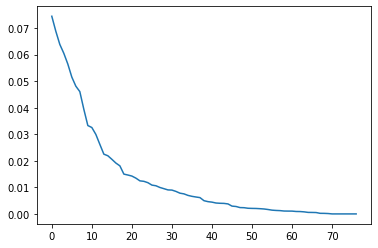

In [39]:
plt.plot(pca.explained_variance_ratio_)

In [40]:
np.cumsum(pca.explained_variance_ratio_)

array([0.07443526, 0.14324414, 0.20707997, 0.26756624, 0.3240103 ,
       0.37553436, 0.42364506, 0.46969692, 0.50909442, 0.54237233,
       0.57490629, 0.60485004, 0.63103373, 0.65353367, 0.67543203,
       0.69599345, 0.71514955, 0.73324953, 0.74823512, 0.76288277,
       0.77713571, 0.7906082 , 0.8030597 , 0.81532635, 0.82708489,
       0.83793657, 0.8485412 , 0.85849495, 0.8679974 , 0.87703756,
       0.88601094, 0.89448676, 0.90229658, 0.90984577, 0.91682087,
       0.92344145, 0.92981098, 0.93594987, 0.94093083, 0.94555327,
       0.94998778, 0.95409421, 0.958099  , 0.96205941, 0.96582044,
       0.96875829, 0.97155572, 0.97394198, 0.97628331, 0.97841497,
       0.98049343, 0.98254426, 0.98451222, 0.98636987, 0.98802972,
       0.98944424, 0.99075071, 0.99199183, 0.99307836, 0.99414199,
       0.99519693, 0.99611581, 0.99700781, 0.99778524, 0.99835814,
       0.99890993, 0.99942747, 0.99965121, 0.99985722, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

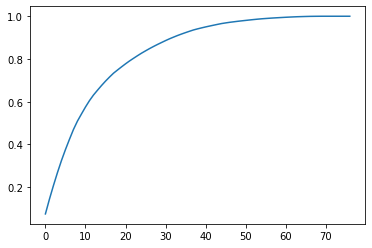

In [41]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [42]:
pca=PCA(n_components=56).fit(trainx)

In [43]:
cp=pca.transform(trainx)

In [44]:
cp=pd.DataFrame(cp)

In [45]:
cp.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,1.355088,-0.425806,-0.464074,-0.123957,-0.782466,0.141985,-0.359330,0.230203,0.406168,-0.005552,...,0.015339,-0.015727,-0.032755,-0.013378,0.012391,-0.024127,0.001739,-0.006007,-0.010267,0.032859
1,-0.741326,-0.823704,-0.130426,0.658825,0.205445,-0.405237,0.017236,-0.489293,-0.105645,0.804379,...,-0.000915,-0.014476,-0.122236,0.014588,0.008532,-0.012113,0.015943,0.014944,0.049635,-0.052361
2,-0.769417,-0.808283,-0.124030,0.641184,0.147766,-0.426984,-0.000233,-0.440518,-0.227176,0.837156,...,-0.010781,0.055894,-0.082127,-0.010436,0.011665,0.002785,0.009393,0.019660,0.056423,-0.050312
3,1.129914,0.386059,0.920894,0.708976,0.427540,-0.260363,-0.856723,-0.394545,-0.402378,-0.537829,...,-0.017127,-0.011170,0.003462,-0.003496,-0.002499,-0.024823,0.003234,-0.009857,0.001282,0.010032
4,1.142639,-0.466529,-0.368693,-0.169396,0.854766,0.117819,-0.257747,-0.399763,0.306157,-0.176180,...,0.606850,0.053184,-0.166578,-0.015987,-0.032326,-0.036800,0.078545,0.002951,-0.030036,0.015255


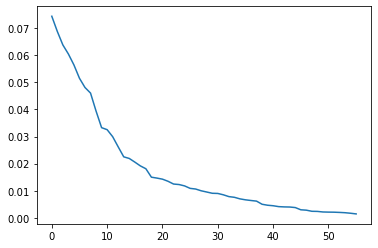

In [46]:
plt.plot(pca.explained_variance_ratio_)

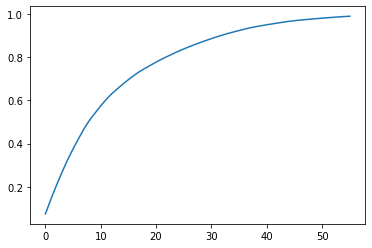

In [47]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))